In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2
import os
import tensorflow as tf
import keras

In [2]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#train_datagen=ImageDataGenerator(rescale=1/255)

#val_datagen=ImageDataGenerator(rescale=1/255)

#test_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

In [27]:
train_ds = image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train',
                                  image_size=(200,200),
                                  seed=42,  batch_size=33)

Found 5216 files belonging to 2 classes.


# train_ds2=train_datagen.flow_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train',
                                  subset="training",
                                  target_size=(200,200),
                                  batch_size=41)

In [7]:
test_ds=image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\test',
                                  image_size=(200,200),
                                  batch_size=41)

Found 624 files belonging to 2 classes.


In [26]:
val_ds=image_dataset_from_directory(r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\val',
                                  image_size=(200,200),
                                  batch_size=4)

Found 16 files belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout,MaxPooling2D , Convolution2D, Flatten , BatchNormalization

# NOTE, here i didnot need to use PD.GET_DUMMIES OR TO_CATEGORICAL FEATURE OF UTILS for onehot encoding the y labels BUT WHY?

In [10]:
model_pneumonia=Sequential()
model_pneumonia

<Sequential name=sequential, built=False>

In [11]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    [ tf.keras.layers.RandomFlip("horizontal"),
      tf.keras.layers.RandomRotation(0.2),
      tf.keras.layers.RandomZoom(0.5)])

In [12]:
model_pneumonia.add(data_augmentation)
model_pneumonia.add(BatchNormalization(input_shape=(200,200,3)))

model_pneumonia.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
model_pneumonia.add(MaxPooling2D())

model_pneumonia.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
model_pneumonia.add(MaxPooling2D())

model_pneumonia.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
model_pneumonia.add(MaxPooling2D())

model_pneumonia.add(Flatten())

model_pneumonia.add(Dense(32,activation='relu'))
model_pneumonia.add(Dense(32,activation='relu'))
model_pneumonia.add(Dense(32,activation='relu'))
model_pneumonia.add(Dense(2,activation='softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model_pneumonia.compile(loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'],
                       optimizer='adam')

In [14]:
history1=model_pneumonia.fit(train_ds, epochs=5  , verbose=1)

Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.7353 - loss: 0.5679
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8367 - loss: 0.3883
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8642 - loss: 0.3444
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8811 - loss: 0.2903
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8849 - loss: 0.2758


In [ ]:
train_ds=tensorflow.keras.preprocessing.image

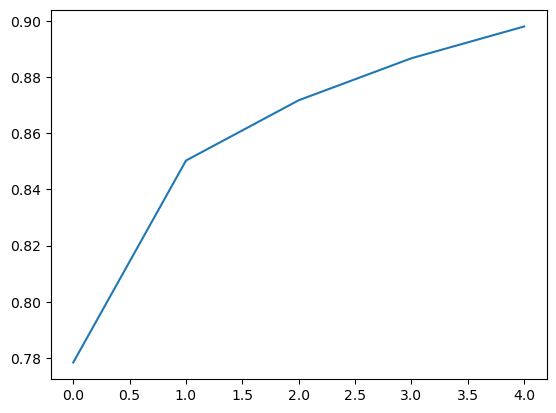

In [15]:
plt.plot(history1.history['accuracy'])

In [16]:
history2=model_pneumonia.fit(train_ds, epochs=10)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9035 - loss: 0.2405
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9094 - loss: 0.2428
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9240 - loss: 0.2095
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9166 - loss: 0.2074
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9167 - loss: 0.2081
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9285 - loss: 0.1868
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9262 - loss: 0.1921
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9330 - loss: 0.1805
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9282 - loss: 0.1688
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9366 - loss: 0.1675


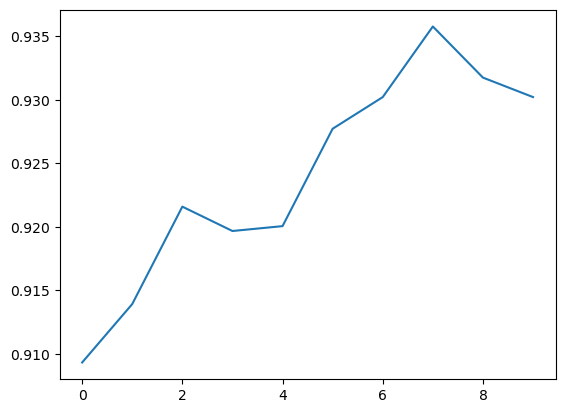

In [17]:
plt.plot(history2.history['accuracy'])

In [18]:
pred_val=model_pneumonia.predict(val_ds)
pred_val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


array([[0.14943153, 0.8505685 ],
       [0.08608317, 0.9139169 ],
       [0.1651567 , 0.8348433 ],
       [0.01451836, 0.9854816 ],
       [0.07741276, 0.9225873 ],
       [0.41942686, 0.5805731 ],
       [0.41176525, 0.5882348 ],
       [0.58729154, 0.4127085 ],
       [0.00801869, 0.9919813 ],
       [0.48606956, 0.51393044],
       [0.0889947 , 0.9110053 ],
       [0.78957444, 0.21042557],
       [0.23143464, 0.76856536],
       [0.03111481, 0.9688852 ],
       [0.24089104, 0.75910896],
       [0.22366774, 0.77633226]], dtype=float32)

In [19]:
pred_test=model_pneumonia.predict(test_ds)
pred_test

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step


array([[0.26783258, 0.7321675 ],
       [0.01920309, 0.98079693],
       [0.691878  , 0.30812198],
       ...,
       [0.9300587 , 0.0699413 ],
       [0.00480044, 0.99519956],
       [0.07429329, 0.92570674]], dtype=float32)

In [20]:
def acc(y_true, y_pred):
    return np.equal(y_true, np.round(y_pred)).mean()

# now, lets change the hyper parameters and then check models accuracy

In [28]:
model_pneumonia3=Sequential()
model_pneumonia3

<Sequential name=sequential_4, built=False>

In [29]:
from tensorflow.keras import layers

data_augmentation3 = tf.keras.Sequential(
    [ tf.keras.layers.RandomFlip("horizontal"),
      tf.keras.layers.RandomRotation(0.5),
      tf.keras.layers.RandomZoom(0.75)])

In [30]:
model_pneumonia3.add(data_augmentation)
model_pneumonia3.add(BatchNormalization(input_shape=(200,200,3)))

model_pneumonia3.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
model_pneumonia3.add(MaxPooling2D())

model_pneumonia3.add(Convolution2D(filters=64, kernel_size=3, activation='relu'))
model_pneumonia3.add(MaxPooling2D())

model_pneumonia3.add(Convolution2D(filters=128, kernel_size=3, activation='relu'))
model_pneumonia3.add(MaxPooling2D(2))

model_pneumonia3.add(Convolution2D(filters=64, kernel_size=3, activation='relu'))
model_pneumonia3.add(MaxPooling2D(2))

model_pneumonia3.add(Flatten())

model_pneumonia3.add(Dense(32,activation='relu'))
model_pneumonia3.add(Dense(64,activation='relu'))
model_pneumonia3.add(Dense(128,activation='relu'))
model_pneumonia3.add(Dense(32,activation='relu'))
model_pneumonia3.add(Dense(2,activation='softmax'))

In [31]:
model_pneumonia3.compile(loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'],
                       optimizer='adam')

In [33]:
history3=model_pneumonia3.fit(train_ds, epochs=15  , verbose=1)

Epoch 1/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.7247 - loss: 0.5672
Epoch 2/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8224 - loss: 0.4241
Epoch 3/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8528 - loss: 0.3639
Epoch 4/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8791 - loss: 0.3086
Epoch 5/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9036 - loss: 0.2478
Epoch 6/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9045 - loss: 0.2369
Epoch 7/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9181 - loss: 0.2158
Epoch 8/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9045 - loss: 0.2392
Epoch 9/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 668s 4s/step - accuracy: 0.9206 - loss: 0.1960
Epoch 10/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9336 - loss: 0.1744
Epoch 11/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9195 - loss: 0.2129
Epoch 12/15
159/159 ━━━━━━━━━━━━━━━━━━━━ 

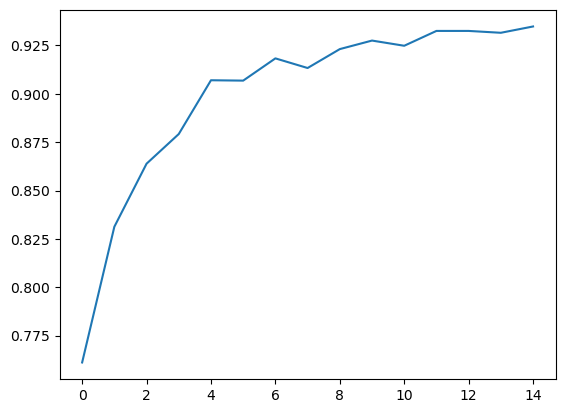

In [34]:
plt.plot(history3.history['accuracy'])

In [35]:
pred_test3=model_pneumonia3.predict(test_ds)
pred_test3

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 509ms/step


array([[0.01118762, 0.98881245],
       [0.99560034, 0.00439964],
       [0.00239756, 0.9976025 ],
       ...,
       [0.00114478, 0.99885523],
       [0.00361324, 0.99638677],
       [0.01235693, 0.9876431 ]], dtype=float32)

In [ ]:
history3=model_pneumonia3.fit(train_ds, epochs=20  , verbose=1)

In [ ]:
plt.plot(history3.history['accuracy'])